## Instacart Project

## Contents

### 1. Importing Dataset
### 2. Considering Security Implications
### 3. Creating Regional Segmentation
### 4. Exclusion of Low-activity Customers
### 5. Marketing and Business Strategy
#### 5a. Age Profiling
#### 5b. Income Profiling
#### 5c. Goods and Departments Profiling
#### 5d. Dependents Profiling

### 1. Importing Dataset

In [4]:
## import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
path = r'C:\Users\matth\05-2023 Instacart Basket Analysis'

In [6]:
## importing products merged
ords_prods_all = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','orders_products_all.csv'))

### 2. Considering security implications

###### Considering any security implications

###### 1. The data is stored securly
###### 2. Not sending out sensitive information to wrong people
###### 3. Careful the stakeholders I am presenting the data too
###### 4. Personally identifiable information (PII) - data which can be traced back to an individual using name, address, age etc

In [7]:
# removing names for PII reasons
ords_prods_all = ords_prods_all.drop(columns=['First Name', 'Surname'])

### 3. Creating regional segmentation

In [8]:
ords_prods_all.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,days_of_median,frequency_flag,Gender,State,Age,date_joined,n_dependants,marital_status,income
0,0,2398795,1,2,3,7,15.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,1,473747,1,3,3,12,21.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2,2254736,1,4,4,7,29.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,3,431534,1,5,4,15,28.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,4,3367565,1,6,2,7,19.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
ords_prods_all = ords_prods_all.drop(columns=['Unnamed: 0'])

In [10]:
## creating new column for region

region=[]
for value in ords_prods_all['State']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [11]:
## adding a new column region based on ^ code

ords_prods_all['region'] = region

In [12]:
# region vs spend flag - creating a cross tab for region and spending flag

region_spend_flag = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)

In [13]:
## viewing what the cross tab looks like based on the above code

region_spend_flag

spending_flag,High spender,Low spender
region,,
Midwest,71698,497447
Northeast,55809,376645
South,103630,711282
West,77934,552711


### 4. Exclusion of low-activity customers

In [14]:
# creating  new column customer_activity to identify low-activity customers
ords_prods_all.loc[ords_prods_all['max_order']>=5,'customer_activity']='High-activity customer'
ords_prods_all.loc[ords_prods_all['max_order']<5,'customer_activity']='Low-activity customer'

In [15]:
# Subset for High-activity customers
df_hactive_cus = ords_prods_all[ords_prods_all['customer_activity']=='High-activity customer']

In [16]:
# exporting high order customer

df_hactive_cus.to_csv(os.path.join(path,'02 Data','Prepared Data','df_hactive_cus.csv'))

In [17]:
## checking that the new coulm has been created

ords_prods_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'days_of_median', 'frequency_flag', 'Gender', 'State',
       'Age', 'date_joined', 'n_dependants', 'marital_status', 'income',
       'region', 'customer_activity'],
      dtype='object')

### 5. Marketing and Business Strategy

#### 5a.Age Profiling

In [18]:
# age statistics
ords_prods_all['Age'].describe()

count    2.447156e+06
mean     4.941775e+01
std      1.846981e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [22]:
ords_prods_all.Age

0          31
1          31
2          31
3          31
4          31
           ..
2447151    81
2447152    22
2447153    32
2447154    32
2447155    56
Name: Age, Length: 2447156, dtype: int64

In [23]:
# Create groups for age profile Young adult -30 and Under, Middle-aged 31 - 55 and Elderly over 55

ords_prods_all.loc[ords_prods_all['Age'] >= 31 & (ords_prods_all['Age'] < 65), 'age_group'] = 'Middle-Aged'
ords_prods_all.loc[ords_prods_all['Age']<30,'age_group'] = 'Young Adults'
ords_prods_all.loc[ords_prods_all['Age']>= 65,'age_group'] = 'Elderly'

In [24]:
## count of values in the new age group

ords_prods_all['age_group'].value_counts()

Middle-Aged     1343862
Elderly          644309
Young Adults     458985
Name: age_group, dtype: int64

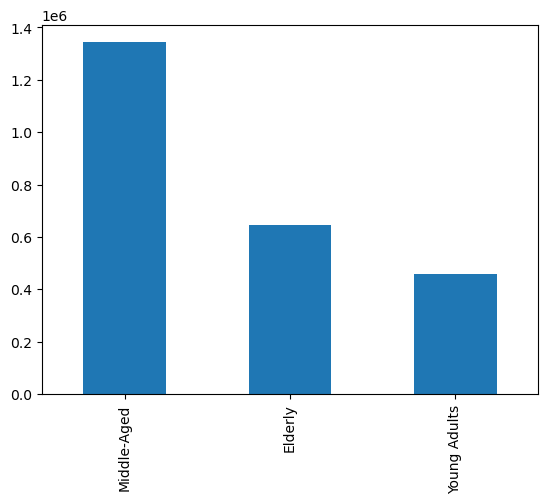

In [25]:
## creating a bar chart based on the group
age_bar = ords_prods_all['age_group'].value_counts().plot.bar()

In [26]:
## saving visualisation
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'), bbox_inches='tight')


In [28]:
# aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
ords_prods_all.groupby('age_group').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices               
                                max       mean  min    max      mean  min
age_group                                                                
Elderly                        30.0  10.686210  0.0   14.8  7.637673  1.0
Middle-Aged                    30.0  10.661111  0.0   14.8  7.650003  1.0
Young Adults                   30.0  10.672015  0.0   14.8  7.660423  1.0

In [38]:
# aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
ords_prods_all.groupby('region').agg({'order_number':['max', 'mean', 'min']})

order_number               
                   max       mean min
region                               
Midwest             99  19.254065   2
Northeast           99  19.584145   2
South               99  19.703709   2
West                99  19.608280   2

In [29]:
## cross tab of age and region
age_region=pd.crosstab(ords_prods_all['region'],ords_prods_all['age_group'],dropna=False)

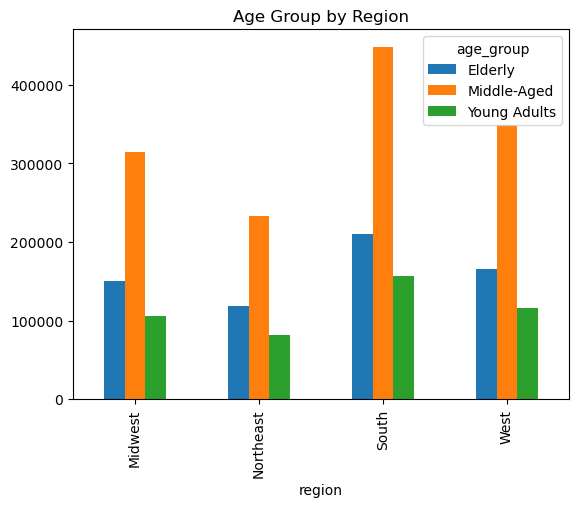

In [30]:
# creating a bar chart between age and region
age_region=age_region.plot.bar()
plt.title('Age Group by Region')
plt.show()

In [39]:
## cross tab of order and region
product_region=pd.crosstab(ords_prods_all['region'],ords_prods_all['product_name'],dropna=True)

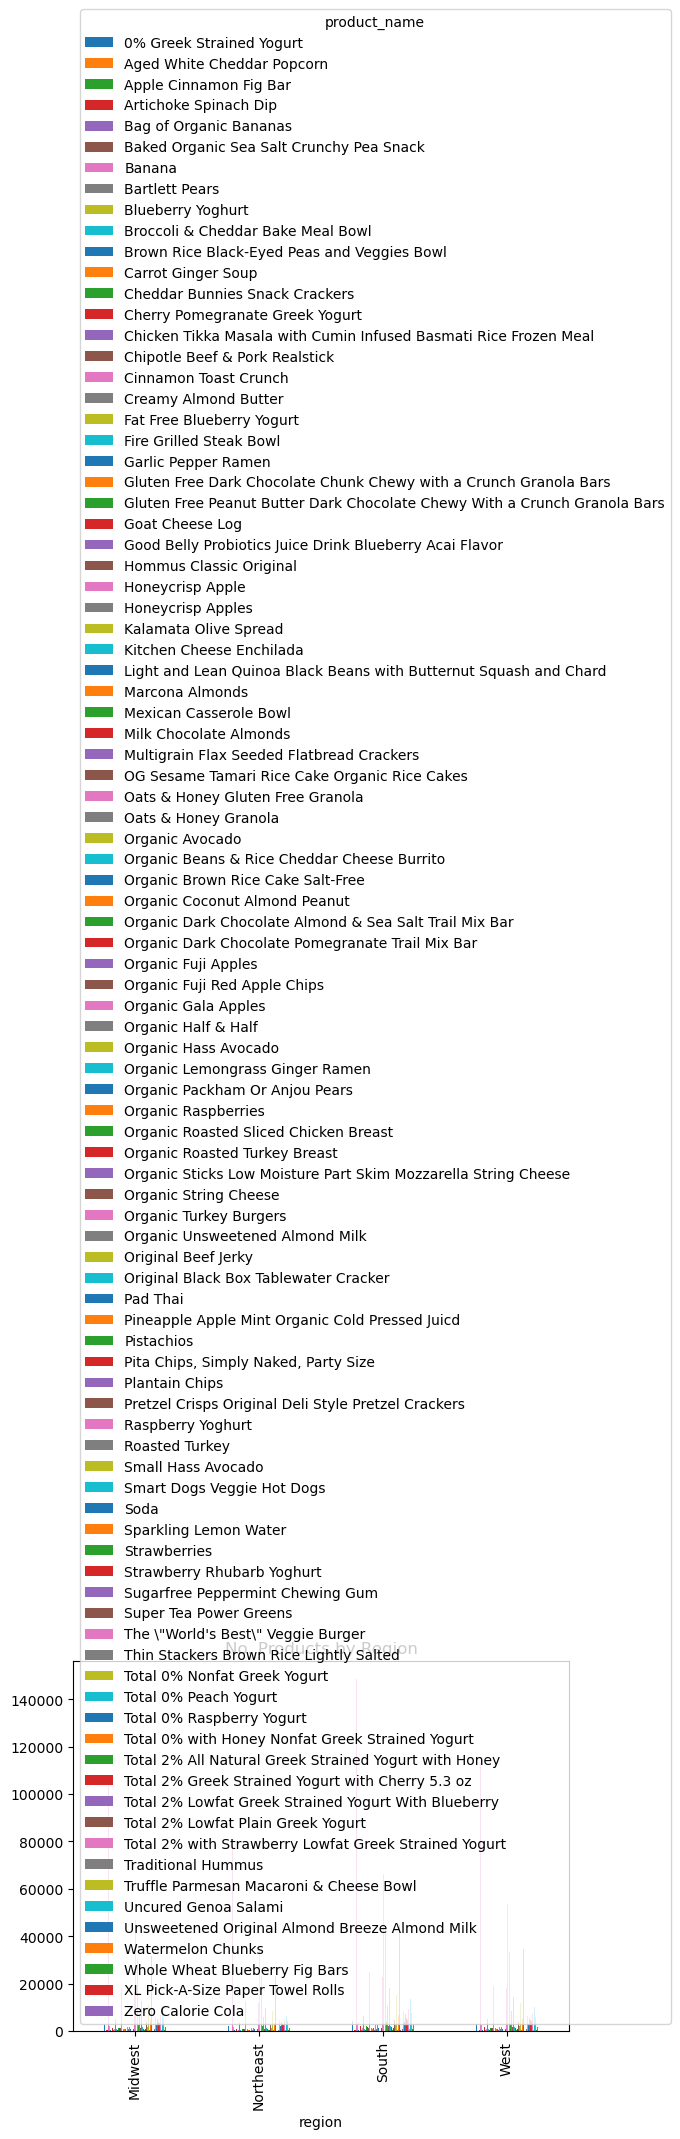

In [40]:
# creating a bar chart between age and region
product_region=product_region.plot.bar()
plt.title('No. Products by Region')
plt.show()

In [73]:
# Saving Visualisation
age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region.png'), bbox_inches='tight')

#### 5b. Income Profiling

In [74]:
ords_prods_all['income'].describe()

count    2.447156e+06
mean     9.805655e+04
std      4.143007e+04
min      2.593700e+04
25%      6.596500e+04
50%      9.596800e+04
75%      1.268050e+05
max      5.939010e+05
Name: income, dtype: float64

In [75]:
# Create groups income profile <35000 low income, >35000 to 75000 moderate, more than 75000 is high income

ords_prods_all.loc[ords_prods_all['income'] >= 35000 & (ords_prods_all['income'] < 75000), 'income_level'] = 'Moderate-income'
ords_prods_all.loc[ords_prods_all['income']<35000,'income_level']='Low-income'
ords_prods_all.loc[ords_prods_all['income']>= 75000,'income_level']='High-income'

In [76]:
# value counts for income groups
ords_prods_all['income_level'].value_counts()

High-income        1633428
Moderate-income     735413
Low-income           78315
Name: income_level, dtype: int64

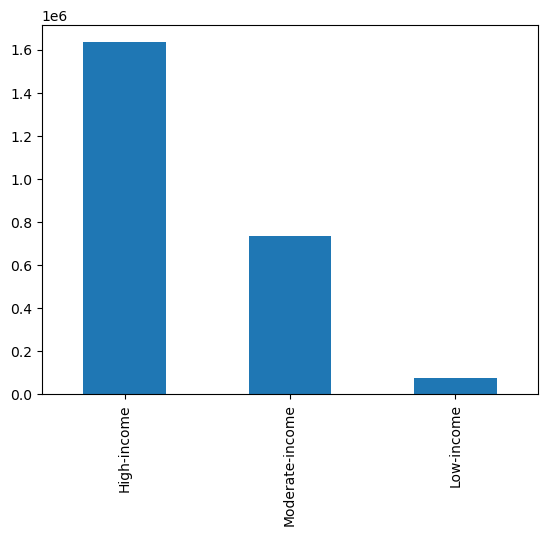

In [77]:
income_bar = ords_prods_all['income_level'].value_counts().plot.bar()

In [78]:
# Saving Visualisation
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_bar.png'), bbox_inches='tight')

In [79]:
# aggregate the max, mean, and min variables on a income level.
ords_prods_all.groupby('income_level').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices               
                                   max       mean  min    max      mean  min
income_level                                                                
High-income                       30.0  10.635123  0.0   14.8  7.788630  1.0
Low-income                        30.0  11.170580  0.0   14.8  6.701034  1.0
Moderate-income                   30.0  10.693375  0.0   14.8  7.438855  1.0

In [81]:
# Create crosstab 
income_region=pd.crosstab(ords_prods_all['region'],ords_prods_all['income_level'],dropna=False)

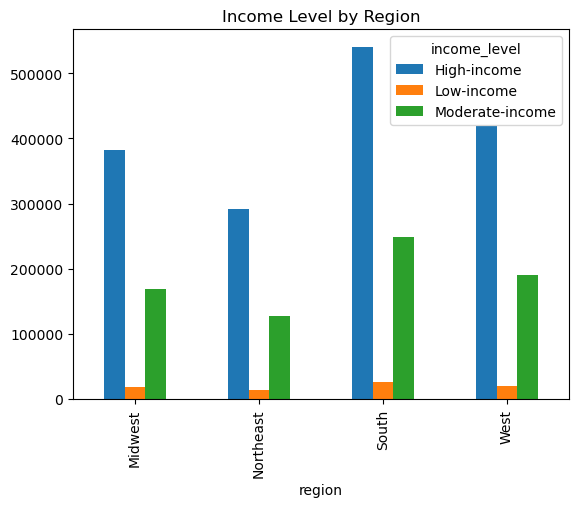

In [82]:
## creating a bar chat for income by region
income_region=income_region.plot.bar()
plt.title('Income Level by Region')
plt.show()

In [83]:
# Saving Visualisation
income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region.png'),bbox_inches='tight')

In [89]:
ords_prods_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'days_of_median', 'frequency_flag', 'Gender', 'State',
       'Age', 'date_joined', 'n_dependants', 'marital_status', 'income',
       'region', 'customer_activity', 'age_group', 'income_level'],
      dtype='object')

In [91]:
departments.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [96]:
# creating a crosstab between department and income
department_income = pd.crosstab(ords_prods_allv2['department'],ords_prods_allv2['income_level'],dropna=False,)

In [97]:
# sorting the data by moderate income
department_income = department_income.sort_values(by=['Moderate-income'], ascending=True)

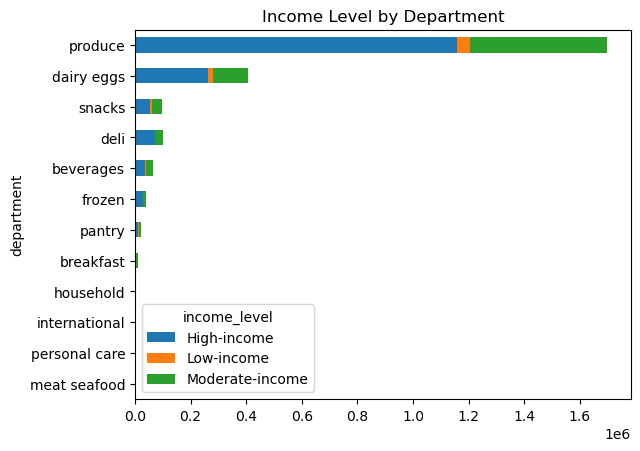

In [98]:
# create a bar chart between income and department
income_dept = department_income.plot.barh(stacked=True)
plt.title('Income Level by Department')
plt.show()

In [100]:
# Saving Visualisation
income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'incomebydepartment.png'),bbox_inches='tight')

#### 5c. Goods and Departments Profiling

In [92]:
## importing departments data
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [93]:
# to view the headers in table
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [94]:
# merge department with ords_prods_all
ords_prods_allv2 = ords_prods_all.merge(departments,on='department_id')

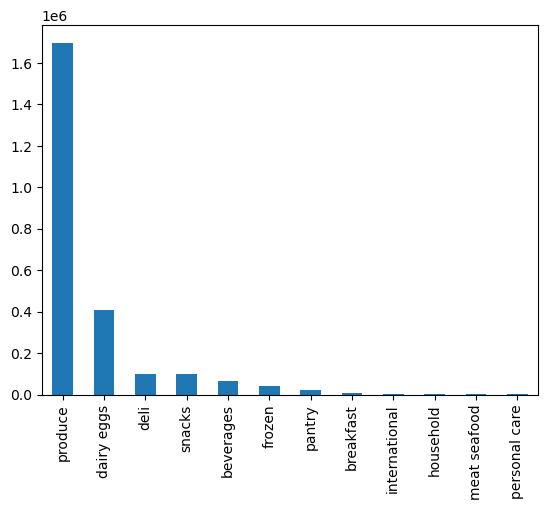

In [102]:
## creating a departments bar
dept_bar = ords_prods_allv2['department'].value_counts().plot.bar()

In [103]:
# Saving Visualisation
dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar.png'),bbox_inches='tight')

In [104]:
# to profile customers who are diary consumer consuners we will create a flag 
ords_prods_allv2.loc[ords_prods_allv2['department_id'] == 16, 'dairy_customer'] = 'dairy consumer'

In [106]:
ords_prods_allv2.loc[ords_prods_allv2['department_id'] != 16, 'dairy_customer'] = 'non-dairy consumer'

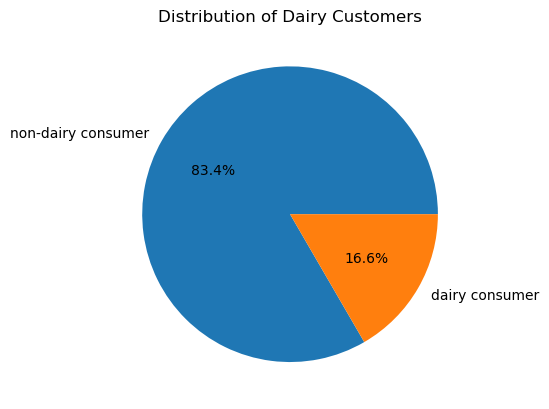

In [107]:
## creating a pie chart based on the new dairy flag column
dairy_pie = ords_prods_allv2['dairy_customer'].value_counts().plot.pie(title = 'Distribution of Dairy Customers', label = '', autopct='%1.1f%%')

In [108]:
## Saving Visualisation
dairy_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dairy_pie.png'),bbox_inches='tight')

In [109]:
## create a crosstab for dairy customers by region
dairy_region =pd.crosstab(ords_prods_allv2['region'],ords_prods_allv2['dairy_customer'], dropna=False)

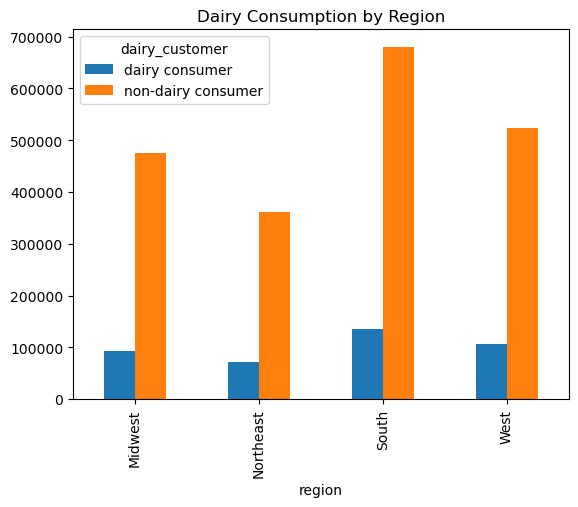

In [110]:
# create a bar chart between dairy customers and region
dairy_region = dairy_region.plot.bar()
plt.title('Dairy Consumption by Region')
plt.show()

In [111]:
## Saving Visualisation
dairy_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dairy_region.png'),bbox_inches='tight')

#### 5d. Dependents Profiling

In [118]:
# create family_flag for each customer: 
ords_prods_allv2.loc[(ords_prods_allv2['n_dependants']==0), 'family_flag'] = 'single no dependants'
ords_prods_allv2.loc[(ords_prods_allv2['n_dependants'] >=1), 'family_flag'] = 'single with dependants'
ords_prods_allv2.loc[(ords_prods_allv2['n_dependants'] == 1), 'family_flag'] = 'married no dependants'
ords_prods_allv2.loc[(ords_prods_allv2['n_dependants'] > 1), 'family_flag'] = 'married with dependants'

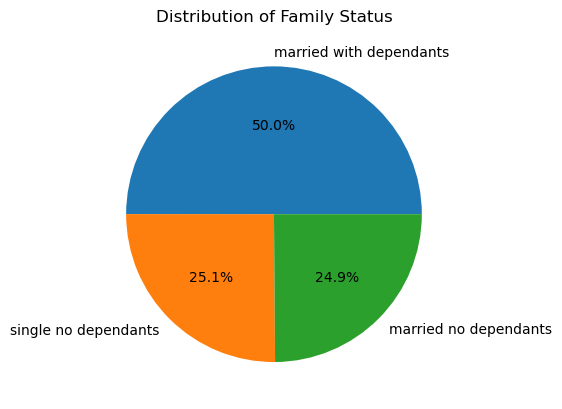

In [119]:
# create a pie chart based on family flag status
family_pie = ords_prods_allv2['family_flag'].value_counts().plot.pie(title = 'Distribution of Family Status', label = '', autopct='%1.1f%%')

In [120]:
## Saving Visualisation
family_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_pie.png'),bbox_inches='tight')